# Анализ и кластеризация стран методом K-Means

Цель: найти похожие между собой страны и регионы, экспериментируя с количеством кластеров и выяснит, что означают эти кластеры.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'C:\Users\mmd28\OneDrive\Рабочий стол\Scripts\ML_engeneer\Clustering\Data\CIA_Country_Facts.csv')

**- EDA. Разведочный анализ данных**

In [4]:
df.head(3)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298


Посмотрим на набор колонок и типы колонок

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

Строк всего 227. Есть данные численные и категориальные (object). Пропущенных значений нет. 

Изучим числовые характеристики колонок

In [6]:
df.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


Построим графики для визуализации данных. 

<Axes: xlabel='Population', ylabel='Count'>

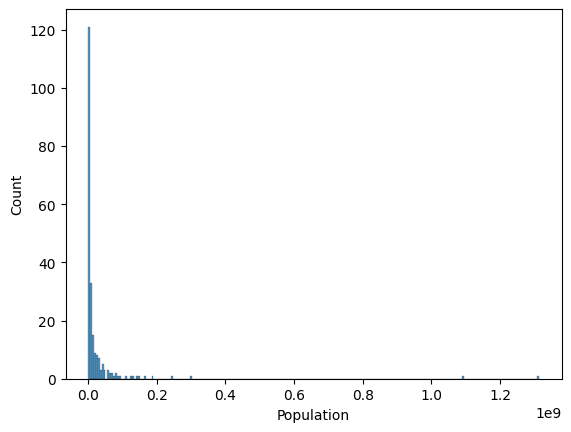

In [7]:
sns.histplot(data=df, x='Population')

Мы получили не наглядный график, так как в Китаеи иИндии людей значительно больше, чем в других странах. Построим график с странами, где население меньше 0,5 миллиарда людей.

<Axes: xlabel='Population', ylabel='Count'>

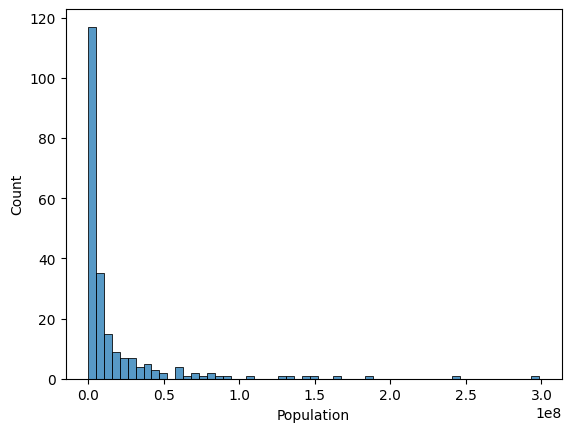

In [8]:
sns.histplot(data=df[df['Population'] < 500000000], x='Population')

Исследуем колонки GDP (ВВП - внутренний валовый продукт) и Regions (регионы). Построим график с средим ВВП на душу населения (GDP per Capita) для каждого региона

In [9]:
df.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

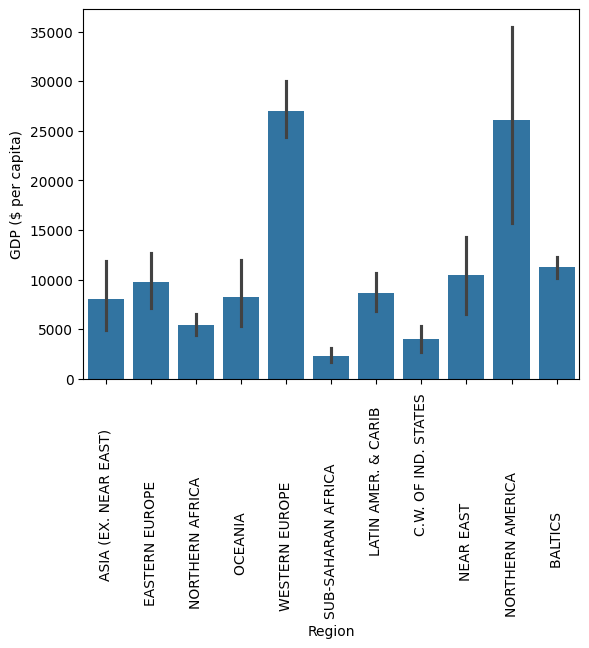

In [10]:
sns.barplot(data=df, y='GDP ($ per capita)', x='Region')
plt.xticks(rotation=90);

Мы видим, что в двух регионах ВВП на душу населения существенно выше, чем в других регионах. При этом, в Northern America мы видим очень большое среднеквадратическое отклонение в виде черной вертикальной длинной черты в верху прямоугольника. 

Построим график, показывающий связь между колонками с количеством телефонов на тысячу человек и ВВП на душу населения. Раскрасим график по колонке регион.

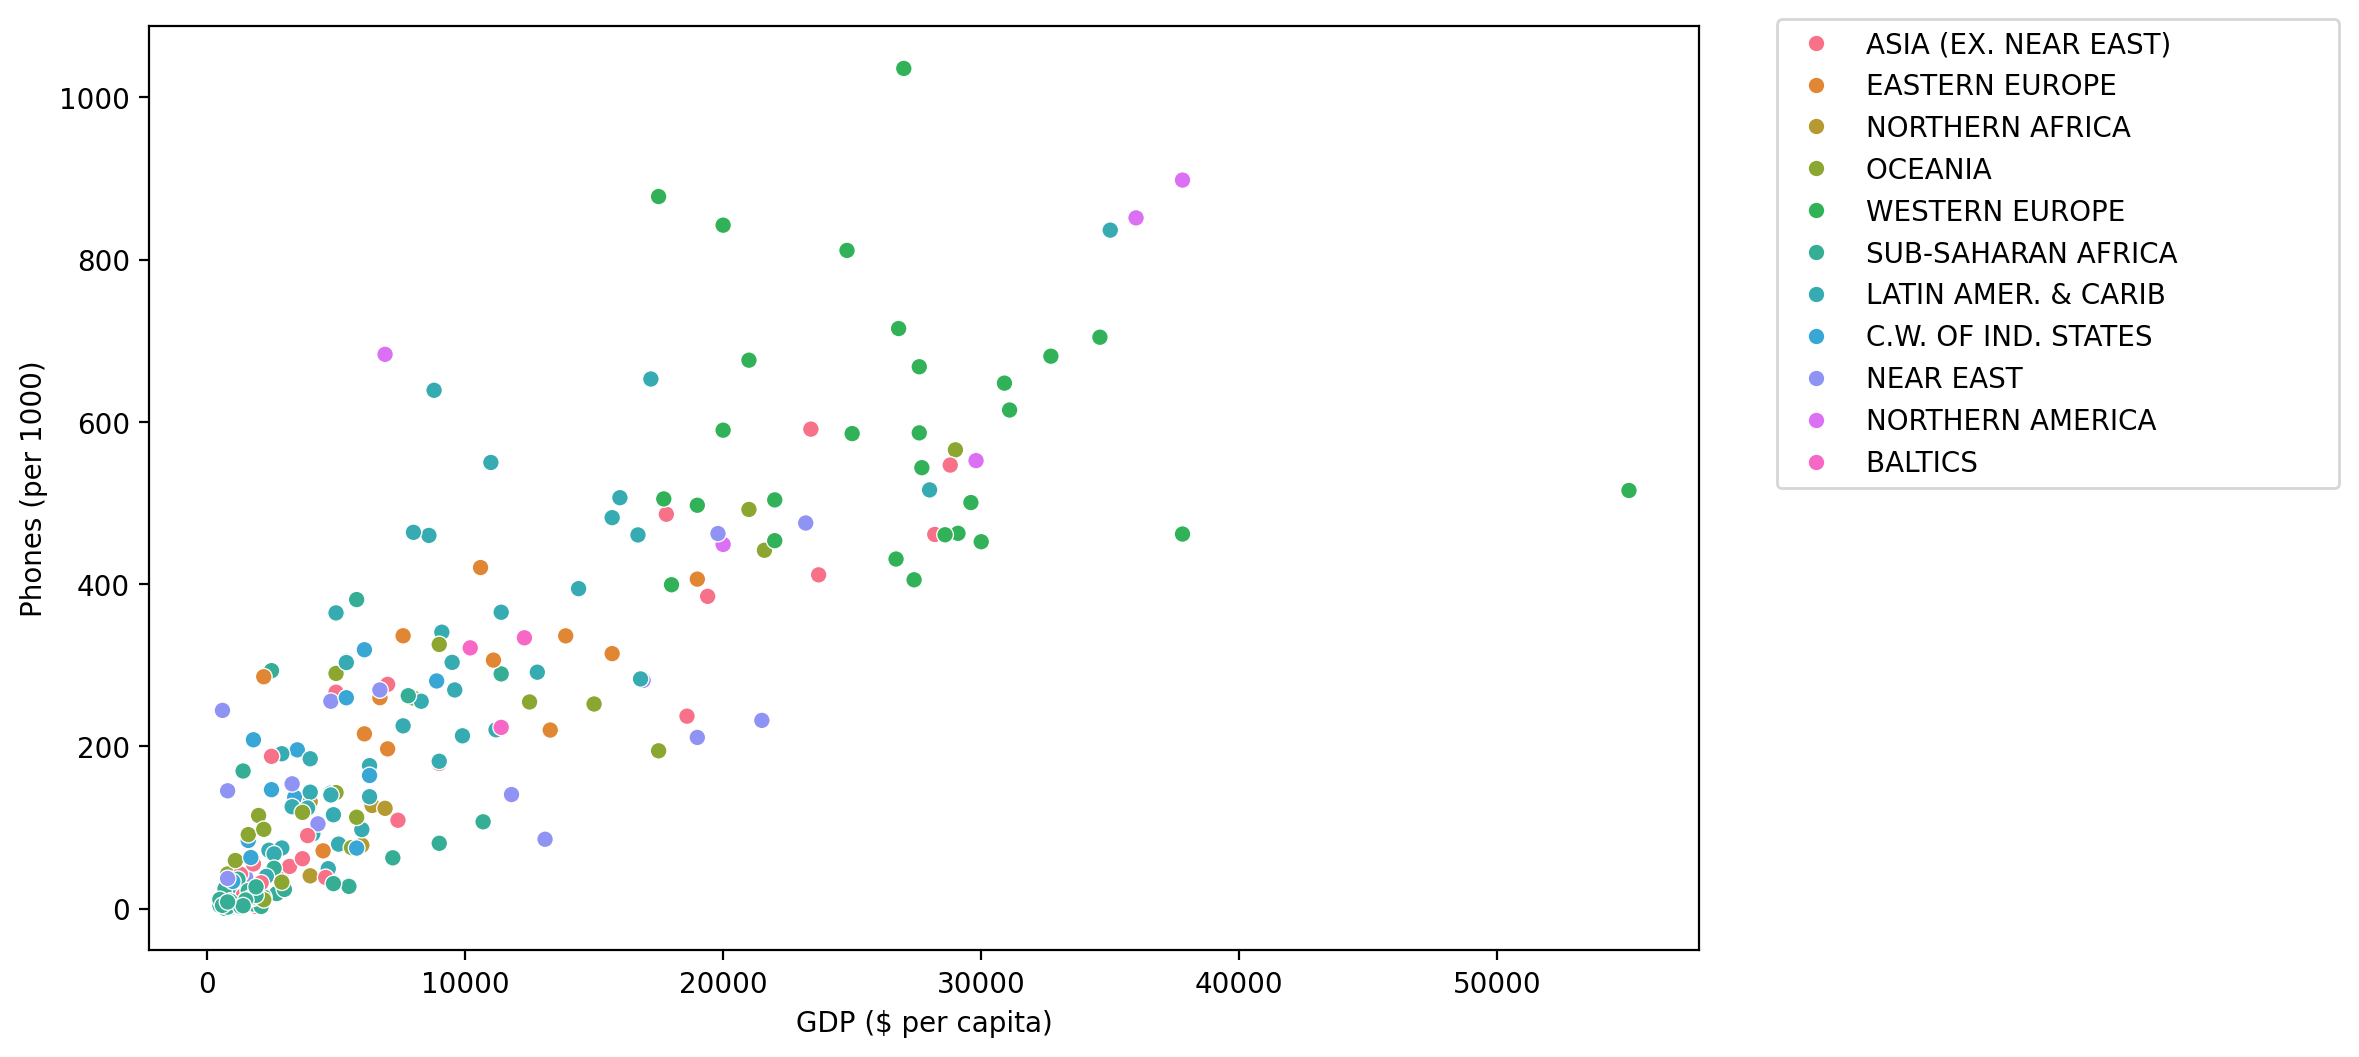

In [11]:
plt.figure(figsize=(10, 6), dpi=200)
sns.scatterplot(data=df, x='GDP ($ per capita)', y='Phones (per 1000)', hue='Region')
plt.legend(loc=(1.05, 0.5))

Мы видим линейную зависимость. Чем больше ВВП, тем больше телефонов. Но на графике мы видим некоторые выбросы. Найдем эти страны.

In [12]:
df[df['Phones (per 1000)'] > 900]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
138,Monaco,WESTERN EUROPE,32543,2,16271.5,205.0,7.75,5.43,27000.0,99.0,1035.6,0.0,0.0,100.0,NaN,9.19,12.91,0.17,NaN,NaN


В этой стране телефонов больше, чем людей

In [13]:
df[df['GDP ($ per capita)'] > 50000]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
121,Luxembourg,WESTERN EUROPE,474413,2586,183.5,0.0,8.97,4.81,55100.0,100.0,515.4,23.28,0.4,76.32,NaN,11.94,8.41,0.01,0.13,0.86


Здесь маленькое население и одно из самых больших ВВП на душу населения

Посмотрим на связь между ВВП на душу населения и грамотностью (Literacy)

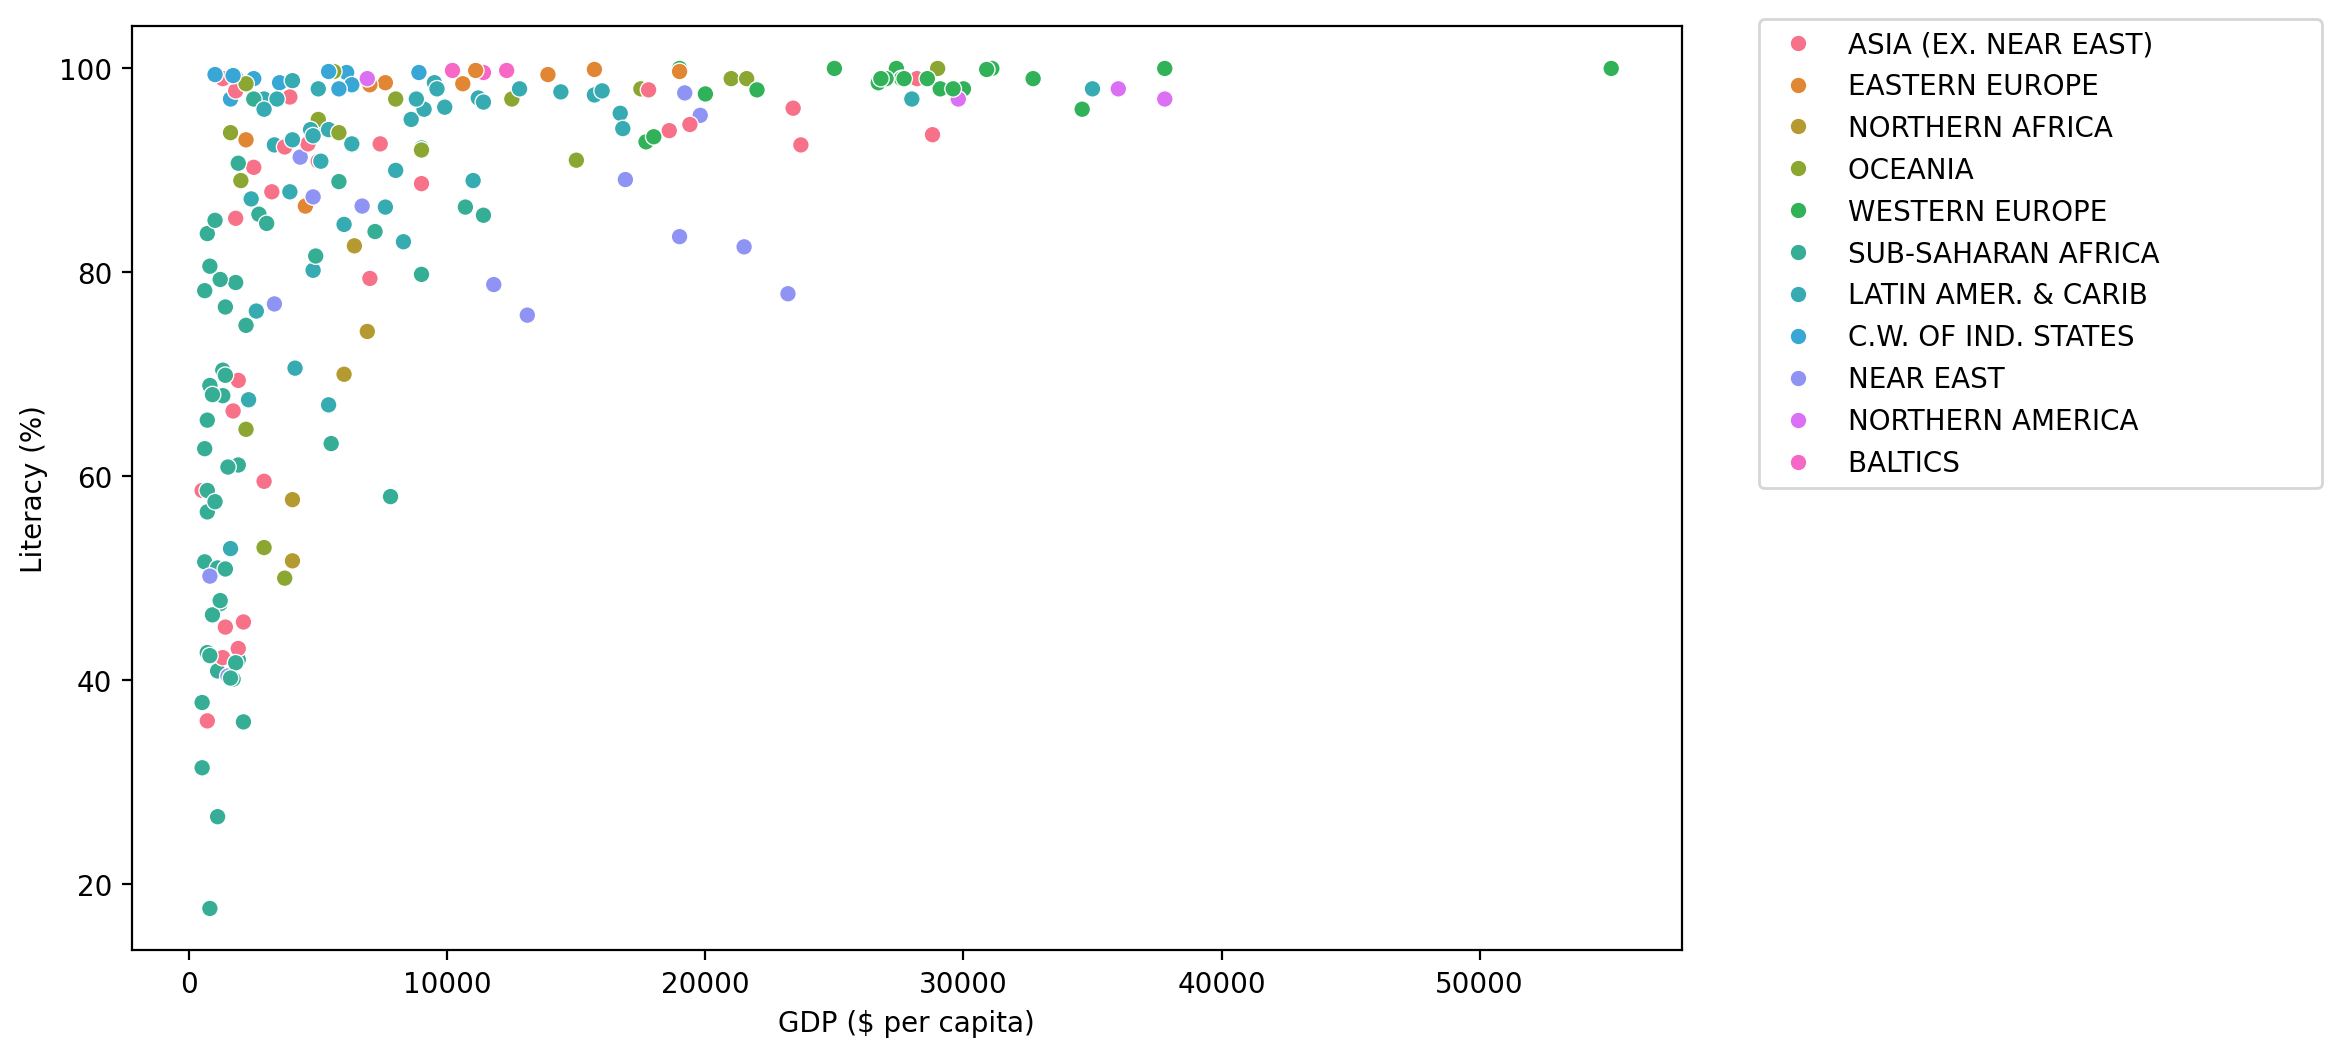

In [14]:
plt.figure(figsize=(10, 6), dpi=200)
sns.scatterplot(data=df, x='GDP ($ per capita)', y='Literacy (%)', hue='Region')
plt.legend(loc=(1.05, 0.5))

Для тех стран, где низкий ВВП на душу населения процент грамотности людей может быть разнообразным. При этом, как только ВВП становится высоким и % грамотности резко повышается. Также, есть некоторые страны с самым низким ВВП и высоким % грамотности. 

Выводы, если процент грамотных людей низкий, то и ВВП на душу населения низкий, но если ВВП на душу население низкий, то это не значит, что и % грамотности населения тоже низкий.

Построим тепловую карту для корреляции между колонками.

<Axes: >

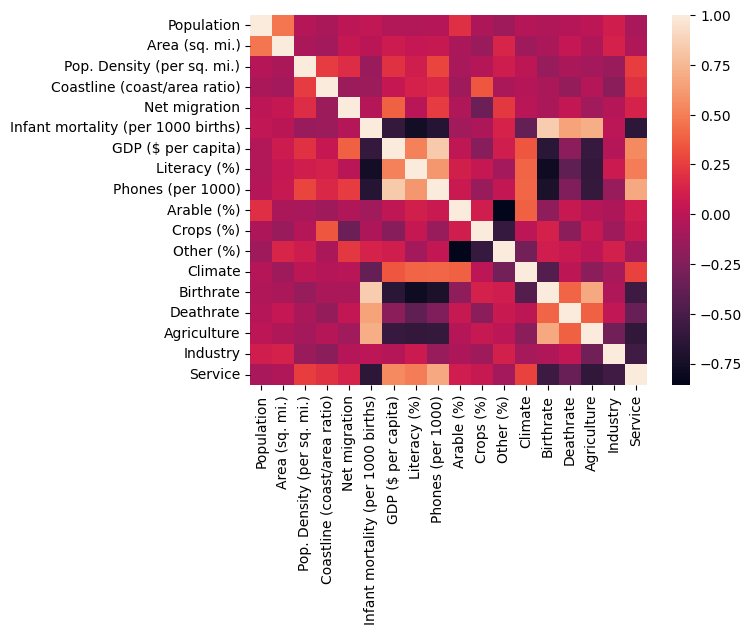

In [15]:
sns.heatmap(df.corr(numeric_only=True))

Мы видим, что колонки 'Birthrate' и 'Infant mortality (per 1000 births)' очень сильно связаны между собой (высокая корреляция)

Построим график иерархической кластеризации данных для корреляции между всеми колонками датафрейма. Иерархическая кластеризация помещает рядом признаки, которые похожи друг на друга. 

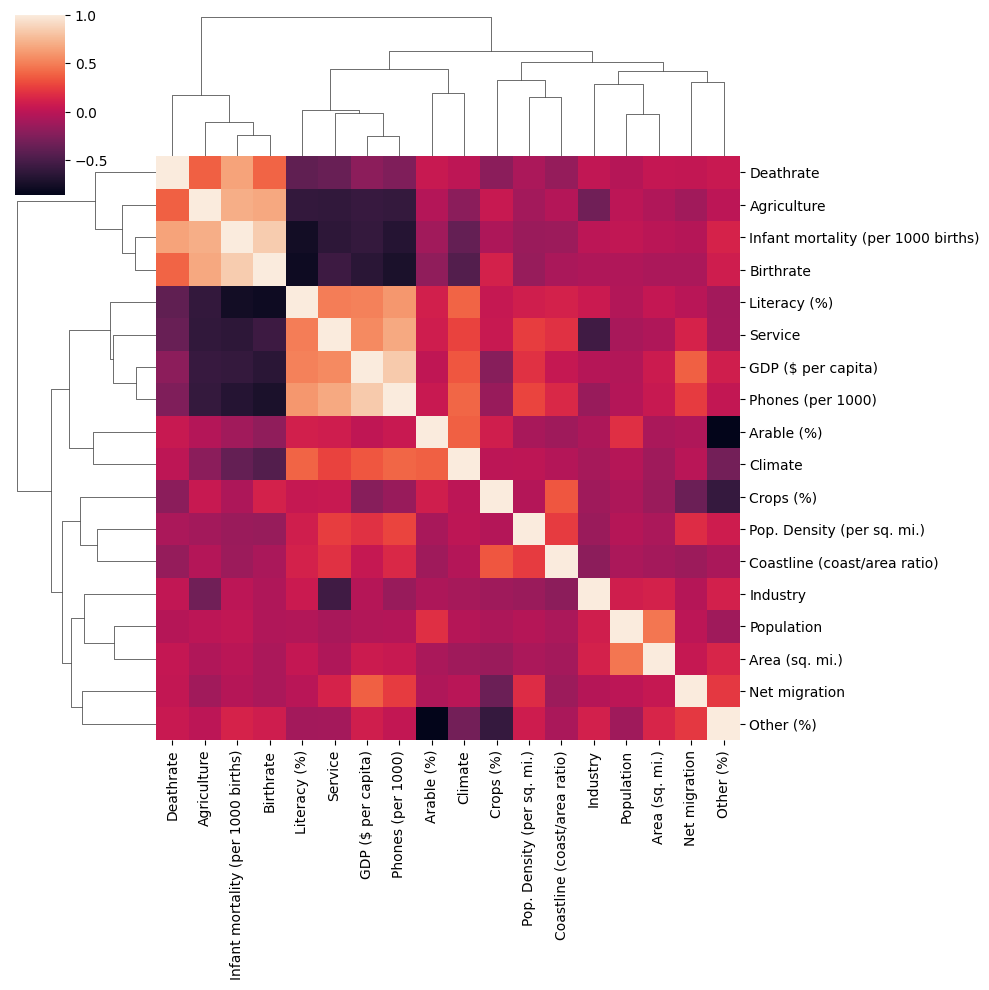

In [16]:
sns.clustermap(df.corr(numeric_only=True))

В верхнем блоке мы видим признаки для рождаемости и смертности. Во втором сверху блоке - признаки, характеризующие общее развитие страны. В третьем блоке - идут меньшие объединения признаков. 

**- Найдем отсутствующие значения (Missing Data)**

K-Means вычисляет расстояние между точками и не может этого сделать, если вместо числа указано  неопределенное значение Nan. 

In [17]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

У нас 200 стран и около 10% отсутствующих данных. Это не много. Исследуем те колонки, где больше всего отсутствующих значений. 

In [18]:
df[df['Agriculture'].isnull()]['Country']

3            American Samoa
4                   Andorra
78                Gibraltar
80                Greenland
83                     Guam
134                 Mayotte
140              Montserrat
144                   Nauru
153      N. Mariana Islands
171            Saint Helena
174    St Pierre & Miquelon
177              San Marino
208       Turks & Caicos Is
221       Wallis and Futuna
223          Western Sahara
Name: Country, dtype: object

Мы видим, что агрокультура в этих странах не развита по понятным причинам. Заменим пропущенные значения на нули в этих странах. мы поменяем значения Nan на нули не только для колонки  Agriculture, но для любых колонок, однако только для тех строк, где колонка Agriculture = Nan

In [19]:
df[df['Agriculture'].isnull()] = df[df['Agriculture'].isnull()].fillna(0)

In [20]:
df[df['Agriculture'].isnull()]['Country']

Series([], Name: Country, dtype: object)

In [21]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                               18
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

У нас остались колонки Literacy и Climate.
Возмем все страны того или иного региона, вычислим среднее значение климата для региона и запишем это значение для тех стран, где значение для Climate отсутствует.

In [22]:
df['Climate'] = df['Climate'].fillna(df.groupby('Region')['Climate'].transform('mean'))

Мы выполнили группировку данных по колонке region (df.groupby('region')), далее взяли только колонку Climate, преобразовали при помощи усреднения mean (transform('mean')) и передали информацию в метод .fillna, чтобы заменить отсутствующие значения Nan.

In [23]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                                0
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

Осталась колонка Literacy (грамотность). Предположим, что мы тоже сможем усреднить значения по регионам и заменим ими пропуски.

In [24]:
df['Literacy (%)'] = df['Literacy (%)'].fillna(df.groupby('Region')['Literacy (%)'].transform('mean'))

In [25]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         1
Infant mortality (per 1000 births)    1
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     2
Arable (%)                            1
Crops (%)                             1
Other (%)                             1
Climate                               0
Birthrate                             1
Deathrate                             2
Agriculture                           0
Industry                              1
Service                               1
dtype: int64

Оставшиеся пропуски удалим (удалим страны целиком).

In [26]:
df = df.dropna()

**- Подготовка данных**

In [27]:
df

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.000000,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.500000,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.000000,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.000000,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.000,0.000,0.000
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.000000,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,79.521429,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,0.00,0.00,0.0,0.000000,0.0,0.02,0.00,99.98,1.0,0.00,0.00,0.000,0.000,0.400
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.200000,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.600000,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


У нас есть некоторые категориальные значения, а также в колонке Country все значения уникальные. Значит, что эта колонка Country не признак, а первичный ключ в наших данных. Удалим её. У нас остается индекс и по нему мы сможем понять, какая строа какой стране соответствует. 

In [28]:
X = df.drop('Country', axis=1)

Создадим дамми-переменные для категориальных признаков без удаления дублирующихся колонок.

In [29]:
X = pd.get_dummies(X)

In [30]:
X

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_BALTICS,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.000000,3.2,12.13,...,False,False,False,False,False,False,False,False,False,False
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.500000,71.2,21.09,...,False,False,True,False,False,False,False,False,False,False
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.000000,78.1,3.22,...,False,False,False,False,False,True,False,False,False,False
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.000000,259.5,10.00,...,False,False,False,False,False,False,False,True,False,False
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.000000,497.2,2.22,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,2460492,5860,419.9,0.00,2.98,19.62,800.0,79.521429,145.2,16.90,...,False,False,False,False,True,False,False,False,False,False
223,273008,266000,1.0,0.42,0.00,0.00,0.0,0.000000,0.0,0.02,...,False,False,False,False,False,True,False,False,False,False
224,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.200000,37.2,2.78,...,False,False,False,False,True,False,False,False,False,False
225,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.600000,8.2,7.08,...,False,False,False,False,False,False,False,False,True,False


**- Масштабирование признаков**

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [33]:
scaled_X = scaler.fit_transform(X)

# Создание и обучение модели KMeans clustering

Создадим и оучим несколько моделей при помощи цикла for (метод "локтя", проверим количество кластеров, сохраним сумму квадратов расстояний от точек до центра для каждой модели в цикле, нанесем данные на график и изобразим на нем метрику для различных значений К.

In [34]:
from sklearn.cluster import KMeans

In [35]:
ssd = []

for k in range(2, 30):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    ssd.append(model.inertia_)

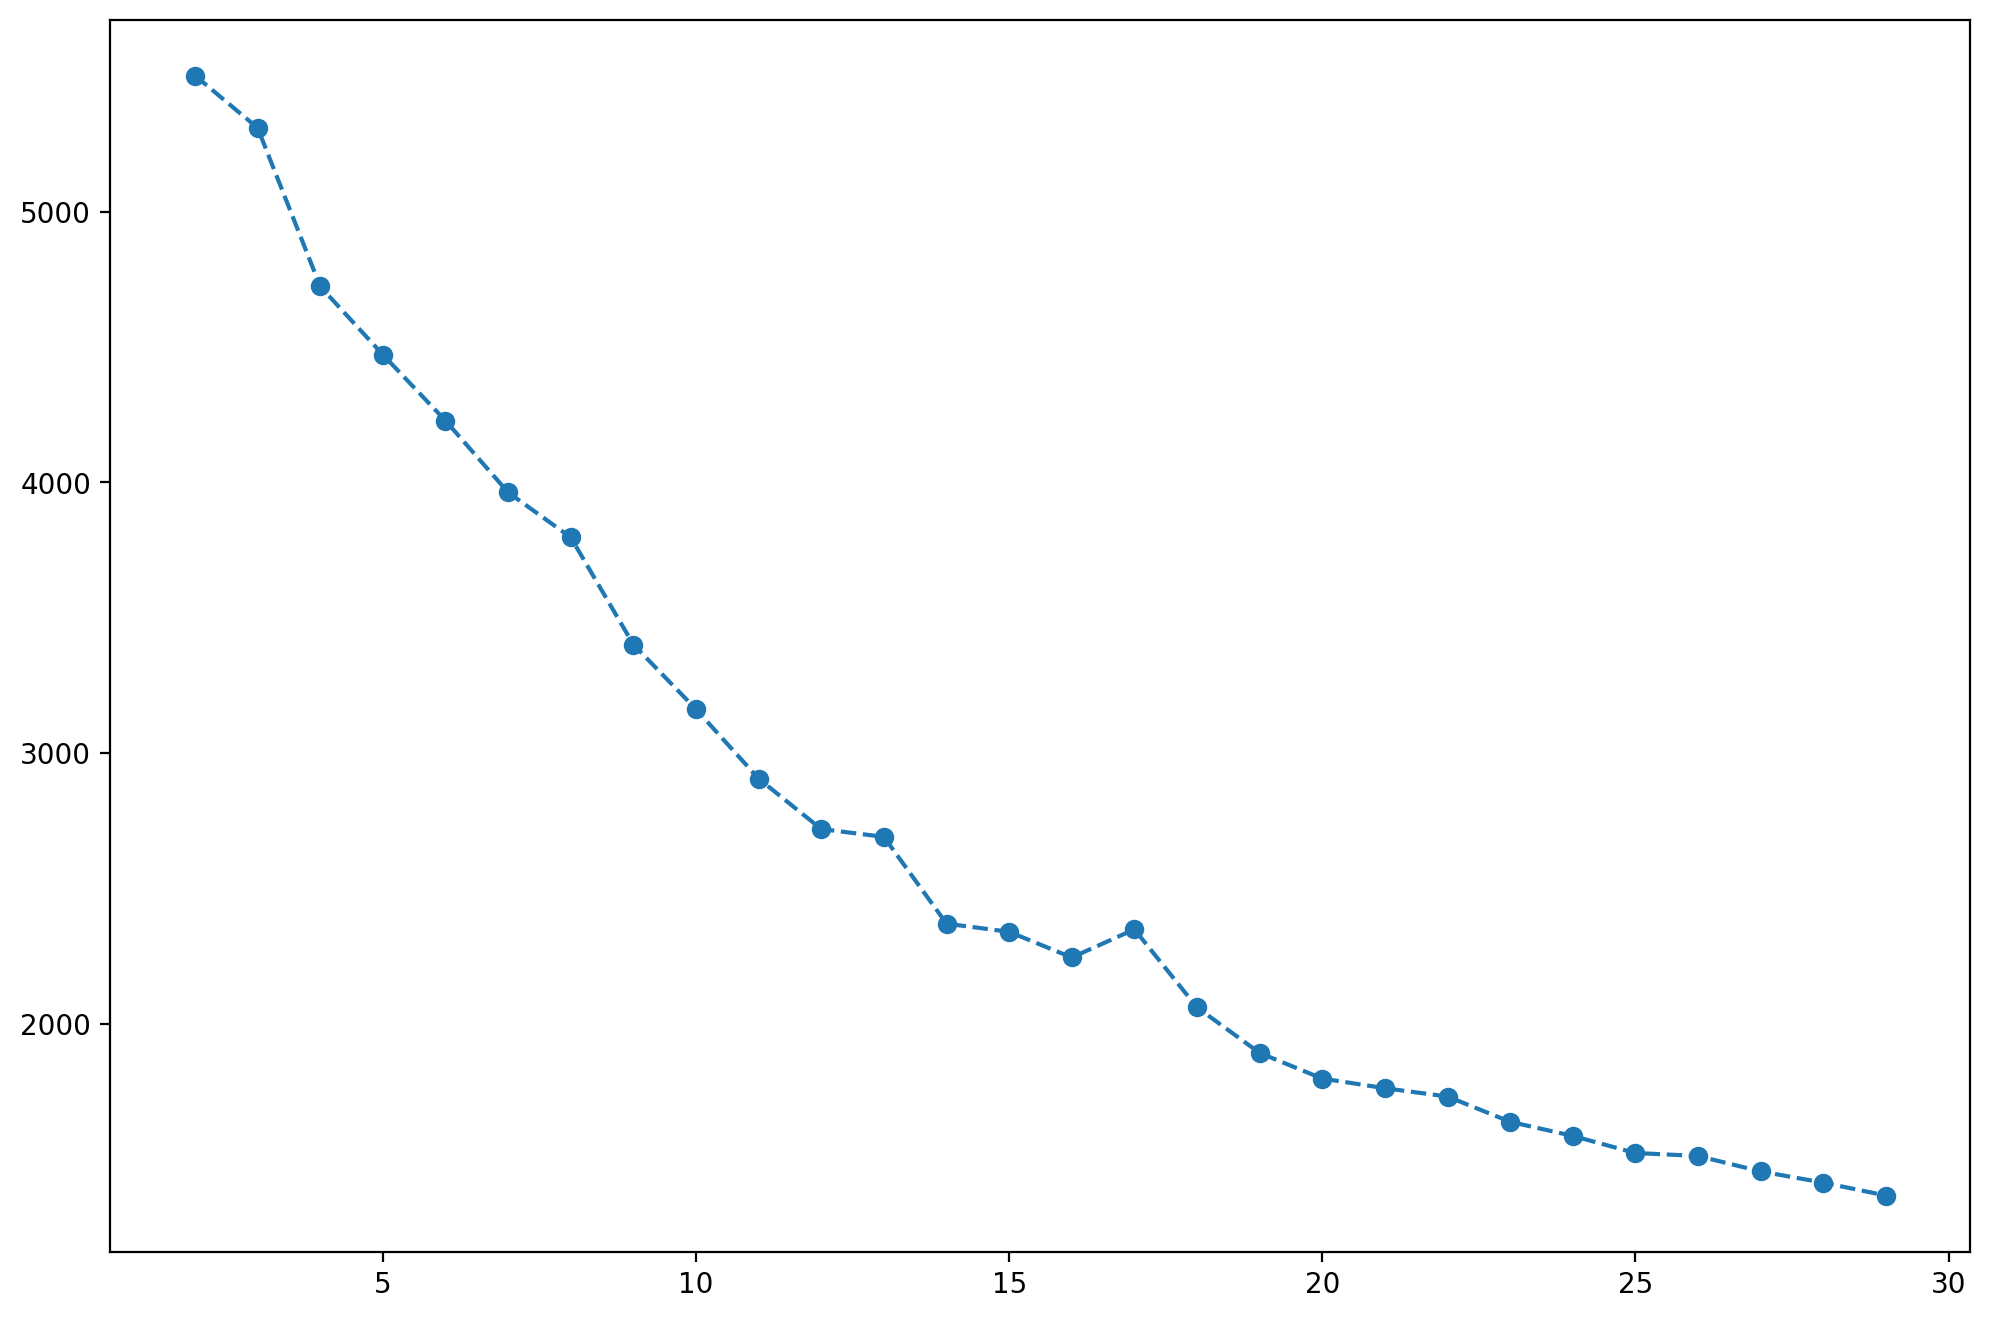

In [36]:
plt.figure(figsize=(12, 8), dpi=200)
plt.plot(range(2, 30), ssd, 'o--')

Построим график, отоброжающий разницу между двумя подряд идущими значениями

<Axes: >

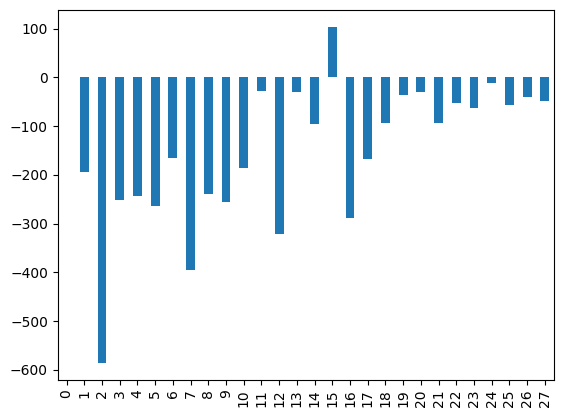

In [37]:
pd.Series(ssd).diff().plot(kind='bar')

Мы видим, где падение было меньше, чем в соседних точках. Например К=3 падение больше, чем К=2 или К=15, чем К=14.

Выясним, какие признаки больше всего влияют на формирование кластеров.

In [38]:
model = KMeans(n_clusters=3)
model.fit(scaled_X)

KMeans(n_clusters=3)

In [39]:
model.labels_

array([0, 2, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 2, 1, 2, 1, 1, 0,
       1, 0, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 0, 2, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       2, 1, 0, 0, 1, 1, 2, 1, 1, 2, 0, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1,
       1, 2, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 2, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0], dtype=int32)

In [40]:
X['K=3 Cluster Labels'] = model.labels_

In [41]:
X.corr()['K=3 Cluster Labels'].sort_values()

Birthrate                                    -0.741589
Infant mortality (per 1000 births)           -0.735308
Region_SUB-SAHARAN AFRICA                    -0.670044
Agriculture                                  -0.526799
Deathrate                                    -0.448971
Other (%)                                    -0.277167
Net migration                                -0.017256
Region_ASIA (EX. NEAR EAST)                  -0.002652
Area (sq. mi.)                                0.001911
Industry                                      0.011679
Region_NEAR EAST                              0.021823
Crops (%)                                     0.036000
Region_NORTHERN AMERICA                       0.046726
Region_NORTHERN AFRICA                        0.051304
Pop. Density (per sq. mi.)                    0.066597
Region_OCEANIA                                0.070113
Region_C.W. OF IND. STATES                    0.073589
Coastline (coast/area ratio)                  0.077777
Population

<Axes: >

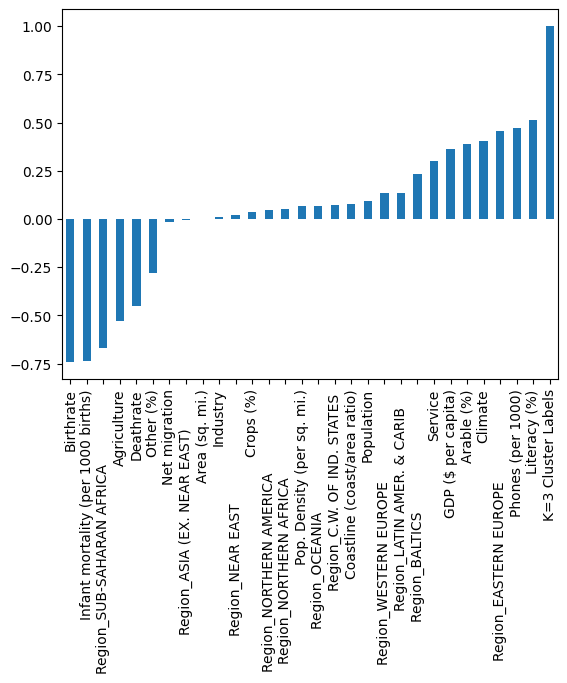

In [42]:
X.corr()['K=3 Cluster Labels'].sort_values().plot(kind='bar')

Мы видим, что сильно коррелируют признаки 'Region_LATIN AMER & CARIB' и 'Region_OCEANIA'

# Нанесем страны на географическую карту

In [43]:
import plotly.express as px

In [44]:
iso_codes = pd.read_csv(r'C:\Users\mmd28\OneDrive\Рабочий стол\Scripts\ML_engeneer\Clustering\Data\country_iso_codes.csv')

In [45]:
iso_codes

,Country,ISO Code
0,Afghanistan,AFG
1,"Akrotiri and Dhekelia – See United Kingdom, The","Akrotiri and Dhekelia – See United Kingdom, The"
2,Åland Islands,ALA
3,Albania,ALB
4,Algeria,DZA
...,...,...
296,"Congo, Dem. Rep.",COD
297,"Congo, Repub. of the",COG
298,Tanzania,TZA
299,Central African Rep.,CAF


Поменяем формат ИСО кодов и преобразуем этот датафрейм в словарь, чтобы затем с его помощью можно было для названия страны находить её ИСО код.

In [46]:
iso_codes.set_index('Country')

,ISO Code
Country,
Afghanistan,AFG
"Akrotiri and Dhekelia – See United Kingdom, The","Akrotiri and Dhekelia – See United Kingdom, The"
Åland Islands,ALA
Albania,ALB
Algeria,DZA
...,...
"Congo, Dem. Rep.",COD
"Congo, Repub. of the",COG
Tanzania,TZA


In [47]:
iso_map = iso_codes.set_index('Country')['ISO Code'].to_dict()

Мы получили словарь соответствия между названиями стран и их ИСО кодами. Добавим его в новую колонку нашего датафрейма

In [48]:
df['ISO CODE'] = df['Country'].map(iso_map)

Добавим колонку с номерами кластеров

In [49]:
df['Cluster'] = model.labels_

In [50]:
df.head(3)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,ISO CODE,Cluster
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,...,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,AFG,0
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,...,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,ALB,2
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,...,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298,DZA,1


In [51]:
# В параметрах метода указываем названия наших колонок
fig = px.choropleth(df, locations='ISO CODE',
                    color='Cluster',
                    hover_name='Country')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

В итоге мы получили разбиение всех стран на три группы, используя алгоритм обучения без учителя

Сделаем это для К=15

In [ ]:
model = KMeans(n_clusters=15)
model.fit(scaled_X)

In [ ]:
df['Cluster15'] = model.labels_

In [ ]:
fig = px.choropleth(df, locations='ISO CODE',
                    color='Cluster15',
                    hover_name='Country')
fig.show()